In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Keras dataset
from keras.datasets import mnist

from ipywidgets import interact, IntSlider, Button

Using TensorFlow backend.


In [4]:
# Keras utils
from keras.utils import np_utils
from keras.utils import to_categorical

In [5]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [6]:
x_train0[5].shape

(28, 28)

# CNN要的維度(28,28,1)

In [7]:
x_train = x_train0.reshape(60000,28,28,1)
x_test = x_test0.reshape(10000,28,28,1)

In [8]:
x_train[5].shape

(28, 28, 1)

In [9]:
y_train = to_categorical(y_train0,10)
y_test = to_categorical(y_test0,10)

In [10]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

# Normalization

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

### CNN Structure

![Structure](CNN_structure.png)

In [13]:
#190509
model = Sequential()

model.add(Conv2D(4, (3,3), padding = 'same', input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(8, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(16, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
          
model.add(Flatten())
model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))

model.add(Activation('softmax'))

In [14]:
model_info = model.compile(loss = 'mse',optimizer=SGD(lr=0.07),metrics=['accuracy'])

In [15]:
model.summary()
#參數1 3*3*4 + 4 = 40
#參數2 3*3*8*4 + 8 = 296
#參數3 3*3*16*8 + 16 = 1168


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          1168      
__________

In [16]:
model_info = model.fit(x_train, y_train, batch_size = 100, epochs = 40)

Epoch 1/40
60000/60000 [==============================] - 37s - loss: 0.0896 - acc: 0.1957    
Epoch 2/40
60000/60000 [==============================] - 37s - loss: 0.0887 - acc: 0.2307    
Epoch 3/40
60000/60000 [==============================] - 37s - loss: 0.0854 - acc: 0.2468    
Epoch 4/40
60000/60000 [==============================] - 37s - loss: 0.0731 - acc: 0.3873    
Epoch 5/40
60000/60000 [==============================] - 37s - loss: 0.0490 - acc: 0.6617    
Epoch 6/40
60000/60000 [==============================] - 38s - loss: 0.0320 - acc: 0.7773    
Epoch 7/40
60000/60000 [==============================] - 37s - loss: 0.0247 - acc: 0.8301    
Epoch 8/40
60000/60000 [==============================] - 37s - loss: 0.0199 - acc: 0.8659    
Epoch 9/40
60000/60000 [==============================] - 35s - loss: 0.0162 - acc: 0.8920    
Epoch 10/40
60000/60000 [==============================] - 35s - loss: 0.0139 - acc: 0.9086    
Epoch 11/40
60000/60000 [========================

<function matplotlib.pyplot.show(*args, **kw)>

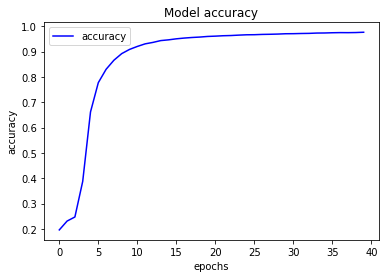

In [17]:
plt.plot(model_info.history['acc'],c = 'b')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(["accuracy"],loc = "best")
plt.show

In [18]:
# MESE -> 回歸
# Cross entropy ->  分類

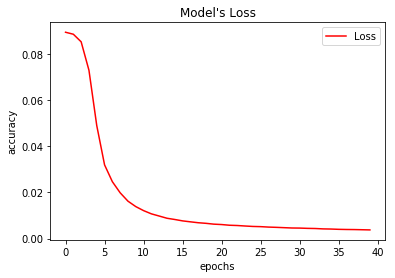

In [19]:
plt.plot(model_info.history['loss'], label='Loss', c="r")

plt.title("Model's Loss")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc="best")
plt.show()